In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
ride_data=pd.read_csv("Pyber/raw_data/ride_data.csv")
city_data=pd.read_csv("Pyber/raw_data/city_data.csv")

In [17]:
city_data = city_data.drop_duplicates('city')
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [18]:
ride_data.head()
ride_count=ride_data.groupby("city")["ride_id"].count()

In [19]:
combined_data = city_data.merge(ride_data, on = 'city', how = 'outer')
combined_data["ride_counts"]=""
combined_data.groupby("city")["ride_id"].count()

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [20]:
urban_city = combined_data.loc[(combined_data["type"] == "Urban")]
suburban_city = combined_data.loc[(combined_data["type"] == "Suburban")]
rural_city = combined_data.loc[(combined_data["type"] == "Rural")]

In [27]:
#Urban City
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city'])['ride_id'].count()
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

#SubUrban City
avg_fare_sub = suburban_city.groupby(['city'])['fare'].mean()
total_rides_sub = suburban_city.groupby(['city'])['ride_id'].count()
total_drivers_sub = suburban_city.groupby(['city'])['driver_count'].value_counts()

#Rural City
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

<IPython.core.display.Javascript object>


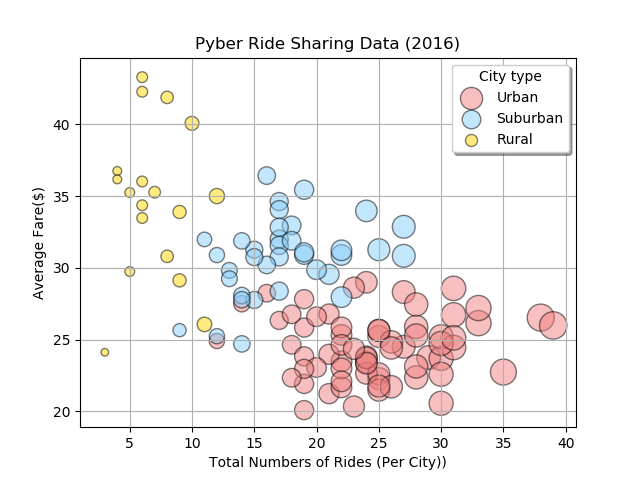

Text(0,0.5,'Average Fare($)')

In [26]:
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_sub, avg_fare_sub,s=total_drivers_sub*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")
plt.grid()
plt.legend(loc='upper right',title="City type",shadow=True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")

<IPython.core.display.Javascript object>


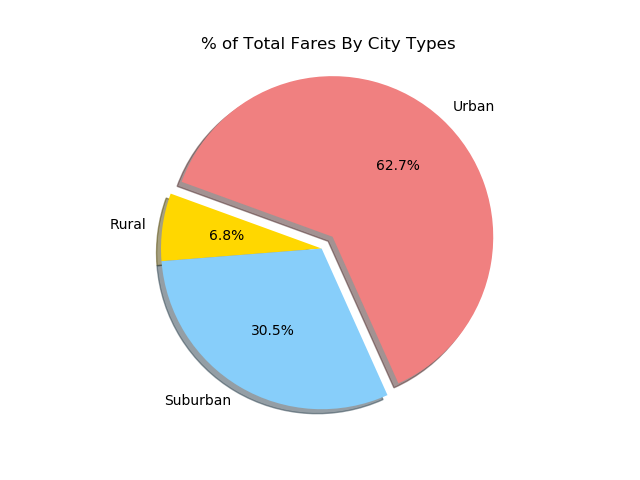

In [28]:
# Calculate Total Fare by City Type
total_fare = combined_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>


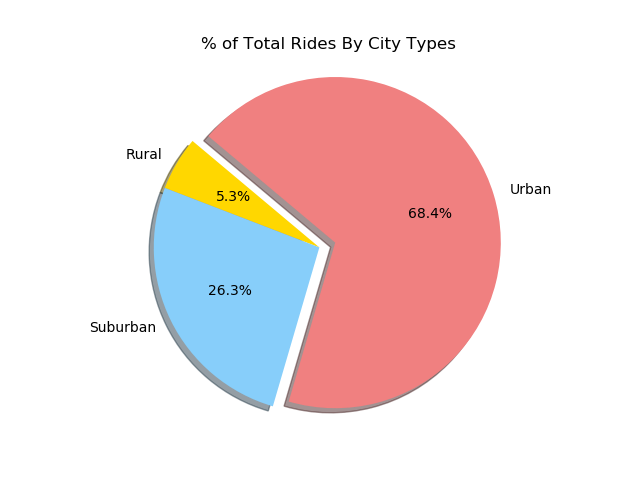

(-1.1110420108142822,
 1.215408844786391,
 -1.085782351148256,
 1.1462471637001541)

In [29]:
# Calculate Total Fare by City Type
total_rides = combined_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

<IPython.core.display.Javascript object>


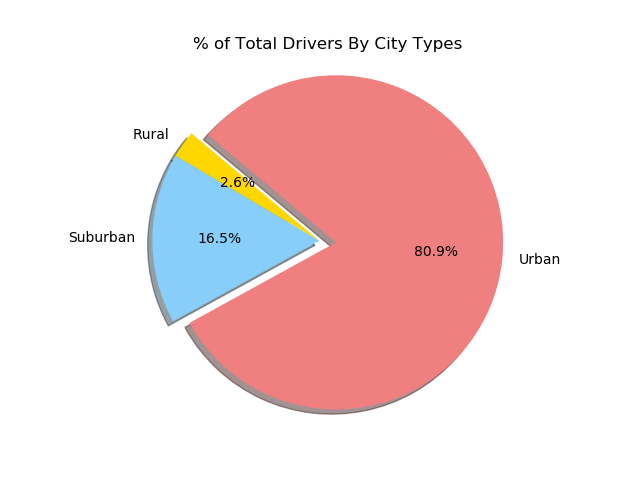

(-1.1079533131331436,
 1.210488336220195,
 -1.1158855877672291,
 1.0960571177251688)

In [30]:
# Calculate Total Drivers by City Type
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")